In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [5]:
df = pd.read_csv('METABRIC_Cleaned_Encoded_Updated_2.csv')

df = df.iloc[:,1:48]

df.head()

,age_at_diagnosis,chemotherapy,er_status,her2_status,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival,pr_status,...,integrative_cluster_3,integrative_cluster_4ER+,integrative_cluster_4ER-,integrative_cluster_5,integrative_cluster_6,integrative_cluster_7,integrative_cluster_8,integrative_cluster_9,primary_tumor_laterality_Left,primary_tumor_laterality_Right
0,43.19,0,1,0,1,0.0,0.30103,4.020,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,48.87,1,1,0,1,1.0,0.30103,4.030,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,47.68,1,1,0,1,3.0,0.00000,4.050,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,76.97,1,1,0,1,8.0,0.30103,6.080,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,78.77,0,1,0,1,0.0,0.60206,4.062,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [15]:
df.shape

(1202, 47)

In [12]:
X = df.loc[:, df.columns != 'overall_survival']
y = df['overall_survival']

In [16]:
X.shape


(1202, 46)

In [18]:
y.shape

(1202,)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [21]:
gnb = GaussianNB()

In [24]:
# pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

scikit-learn 1.1.3 requires joblib>=1.0.0, but you'll have joblib 0.17.0 which is incompatible.


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [25]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [26]:
forward_feature_selection2 = SFS(gnb,
                                k_features = (1,46),
                                forward = True,
                                floating = False,
                                verbose = 2,
                                scoring = "accuracy",
                                cv = 5
                                ).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.3s finished

[2022-12-05 15:00:26] Features: 1/46 -- score: 0.6148373235113567[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished

[2022-12-05 15:00:26] Features: 2/46 -- score: 0.6314732965009209[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    0.1s finished

[2022-12-05 15:00:27] Features: 3/46 -- score: 0.6458931860036833[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished

[2022-12-05 15:00:32] Features: 28/46 -- score: 0.6759054634745242[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2022-12-05 15:00:32] Features: 29/46 -- score: 0.6781399631675874[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2022-12-05 15:00:32] Features: 30/46 -- score: 0.6759177409453652[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2022-12-05 15:00:32] Features: 31/

In [27]:
features = forward_feature_selection2.k_feature_names_

features

('age_at_diagnosis',
 'hormone_therapy',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'nottingham_prognostic_index',
 'radio_therapy',
 'tumor_size',
 'tumor_other_histologic_subtype_Ductal/NST',
 'pam50_+_claudin-low_subtype_LumB',
 'cellularity_High',
 'cellularity_Moderate',
 'inferred_menopausal_state_Post',
 'integrative_cluster_5',
 'integrative_cluster_8')

In [28]:
forward_feature_selection2.k_score_

0.6803499079189688

In [29]:
X_train_features = X_train.loc[:, features]

X_test_features = X_test.loc[:, features]

In [30]:
gnb.fit(X_train_features, y_train)

GaussianNB()

In [33]:
gnb.score(X_test_features, y_test)

0.7009966777408638

In [38]:
pred = gnb.predict(X_test_features)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [41]:
print(confusion_matrix(y_test, pred))

[[ 58  65]
 [ 25 153]]


In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.47      0.56       123
           1       0.70      0.86      0.77       178

    accuracy                           0.70       301
   macro avg       0.70      0.67      0.67       301
weighted avg       0.70      0.70      0.69       301



In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [55]:
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
gnb_probs = gnb.predict_proba(X_test_features)

# keep probabilities for the positive outcome only
gnb_probs = gnb_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)

In [56]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gaussian Naive Bayes: ROC AUC=%.3f' % (gnb_auc))

No Skill: ROC AUC=0.500
Gaussian Naive Bayes: ROC AUC=0.757


In [57]:
# calculate roc curves

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, gnb_probs)

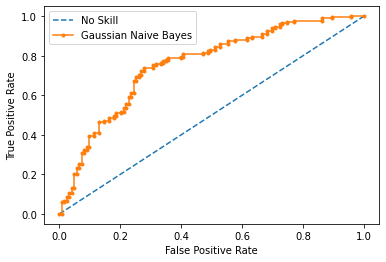

In [58]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Gaussian Naive Bayes')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()